<a href="https://colab.research.google.com/github/vhppacheco/Fundamentos-de-Valuation/blob/main/VPL_e_TIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos de Avaliação de Investimentos**

## VPL - Valor Presente Líquido

#### O método do Valor Presente Líquido (VPL) se baseia na metodologia do fluxo de caixa descontado. Ele mede o Valor Presente (VP) dos fluxos de caixa futuros (VF) gerados pela empresa / projeto ao longo de sua vida útil, descontado a uma taxa que representa seu custo de oportunidade, diminuindo o valor do investimento inicial. Critério de decisão: Se o VPL > 0, ou seja, se for superior ao investimento realizado (também na mesma data), o projeto é economicamente viável. Se o VPL <0, o mesmo deve ser rejeitado.
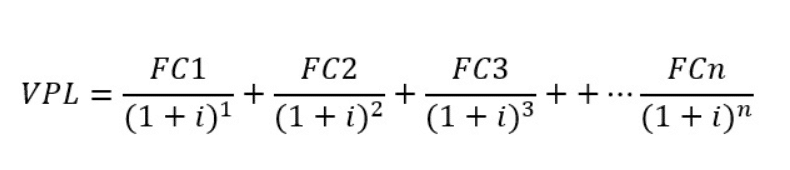

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

### Exemplo 1 - Comparando Investimentos


A.O Tesouro Selic 2023 prefixado que custa 10.729,56 reais e rende 4,39% ao ano para vencer daqui 2 anos.

B. Uma cota de fundo imobiliário que paga 0,7% ao mês durante 2 anos e custa  15 mil reais. Considera-se que a variação do preço da cota ao final do período seja 0.




A. Tesouro Selic

In [ ]:
def VPL_tesouro(taxa, fluxo_caixa):
    total = 0.0
    for i, fluxo_caixa in enumerate (fluxo_caixa):
        total += fluxo_caixa/(1 + taxa)**i
    return total

Convertendo a taxa (anual para mensal) e obtendo o rendimento mensal do título

In [ ]:
taxa = ((1+0.0439)**(1/12))-1
rendimento_mensal = 10729.56*taxa
print(f'A taxa e o rendimento mensal são de: {taxa*100}% e {rendimento_mensal}')

A taxa e o rendimento mensal são de: 0.3586725245666944% e 38.48398372689822


In [45]:
fluxo_caixa = [-10729.56,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,38.48,10768.04]
print('O VPL do Investimento é ',VPL_tesouro(taxa, fluxo_caixa))

O VPL do Investimento é  -0.09145297063878388


B. Fundo Imobiliário

In [ ]:
def VPL_fundo(taxa1, fluxo_caixa1):
    total = 0.0
    for i, fluxo_caixa1 in enumerate (fluxo_caixa1):
        total += fluxo_caixa1/(1 + taxa1)**i
    return total

Cálculo dos recebimentos mensais do fundo

In [ ]:
recebimentos_mensais = 15000*0.007
recebimentos_mensais

105.0

Como se trata de um fundo imobiliário e, portanto, oferece mais risco que o título do governo, o investidor exige um retorno maior.
Neste exemplo usaremos uma taxa 10% maior que a taxa de atratividade do tesouro (4,39% a.a)


In [ ]:
taxa1 = taxa*1.1
taxa1

0.003945397770233639

In [46]:
fluxo_caixa1 = [-15000, 105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,15105]
print('O VPL do Investimento é ',VPL_fundo(taxa1, fluxo_caixa1))

O VPL do Investimento é  1047.230583698758


## O Numpy oferece o *npv* que possibilita o cálculo do VPL sem a necessidade de definirmos uma função. Segue a aplicação no Exemplo 1

## Para o Tesouro

In [ ]:
NPV_tesouro = np.npv(taxa, fluxo_caixa)

In [ ]:
NPV_tesouro

-0.09145297063696489

## Para o Fundo

In [ ]:
NPV_fundo = np.npv(taxa1, fluxo_caixa1)

In [ ]:
NPV_fundo

1047.2305836987562

## TIR - Taxa Interna de Retorno

#### A TIR, a Taxa Interna de Retorno de um empreendimento, é uma medida relativa (%) — que demonstra o quanto rende um investimento (encontrar uma taxa intrínseca de rendimento), considerando a mesma periodicidade dos fluxos de caixa. Matematicamente, a TIR é uma taxa hipotética que iguala o Valor Presente (VP) das entradas do fluxo esperado do projeto ao valor presente dos custos esperados do projeto ou, em outras palavras, que força o VPL ser igual a zero.Deve-se aceitar o projeto se a TIR for > custo de oportunidade do capital e rejeitá-lo se a TIR for < que a taxa de desconto
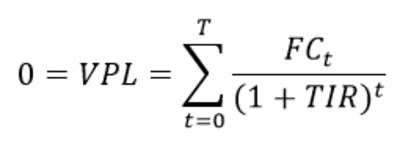

Usaremos o Exemplo 1 para aplicação da TIR

In [36]:
def TIR_tesouro(fluxo_caixa, interacoes = 100):
    taxa = ((1+0.0439)**(1/12))-1
    investimento = fluxo_caixa[0]

    for i in range (1, interacoes +1):
        taxa*= (1-VPL_tesouro(taxa, fluxo_caixa)/investimento)
    return taxa

In [37]:
VPL_tesouro(1, fluxo_caixa)

-10691.079362761973

In [38]:
TIRtesouro = round(TIR_tesouro(fluxo_caixa)* 100,3)
print(f'A TIR do Tesouro é {TIRtesouro}%')

A TIR do Tesouro é 0.359%


Usando o Numpy (irr)

In [39]:
TIR_tesouro = round(np.irr(fluxo_caixa)*100,3)
print(f'A TIR do Tesouro é {TIR_tesouro}%')

A TIR do Tesouro é 0.359%


In [40]:
def TIR_fundo(fluxo_caixa1, interacoes = 100):
    taxa1 = 0.003945397770233639
    investimento1 = fluxo_caixa1[0]

    for i in range (1, interacoes +1):
        taxa1*= (1-VPL_fundo(taxa1, fluxo_caixa1)/investimento1)
    return taxa1

In [41]:
VPL_fundo(1, fluxo_caixa1)

-14894.999112188816

In [42]:
TIRfundo = round(TIR_fundo(fluxo_caixa1)* 100,2)
print(f'A TIR do Fundo é {TIRfundo}%')

A TIR do Fundo é 0.7%


Usando o Numpy (irr)

In [43]:
TIR_fundo = round(np.irr(fluxo_caixa1)*100,2)
print(f'A TIR do Fundo é {TIR_fundo}%')

A TIR do Fundo é 0.7%
